# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [3]:
total_data = pd.read_csv("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/-rbol-de-decisiones-machine-learning-python-template/data/raw/diabetes.csv")

total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Se podría aplicar que BMI de 0 se cambie por la media, la presión arterial inferior a 50 se cambie por 50, si la insulina es 0 se cambie por 2 y si la glucosa es menor de 70 se cambie por 70. Esto es porque los valores 0 no son compatibles con la realidad, por lo que lo ajusto para que sean más realistas respecto a datos reales.

In [5]:
# def clean_data(df):
#     # Reemplazar 0 en BMI por la media sin contar ceros
#     bmi_mean = df["BMI"][df["BMI"] != 0].mean()
#     df["BMI"] = df["BMI"].replace(0, bmi_mean)
    
#     # Reemplazar valores menores a 50 en BloodPressure por 50
#     df["BloodPressure"] = df["BloodPressure"].apply(lambda x: 50 if x < 50 else x)
    
#     # Reemplazar 0 en Insulin por 2 (mínimo realista)
#     df["Insulin"] = df["Insulin"].replace(0, 2)
    
#     # Reemplazar valores menores a 70 en Glucose por 70
#     df["Glucose"] = df["Glucose"].apply(lambda x: 70 if x < 70 else x)
    
#     return df

# # Aplicar la función al DataFrame
# total_data = clean_data(total_data)



### Paso 2: Exploración y limpieza de datos

In [6]:
total_data.shape

(768, 9)

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
total_data.duplicated().sum()

np.int64(0)

- Pregnancies. Número de embarazos del paciente (numérico)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

#### Eliminar información irrelevante

No se puede eliminar información ya que todas las columnas aportan datos importantes

#### Paso 3: Análisis sobre variables numéricas

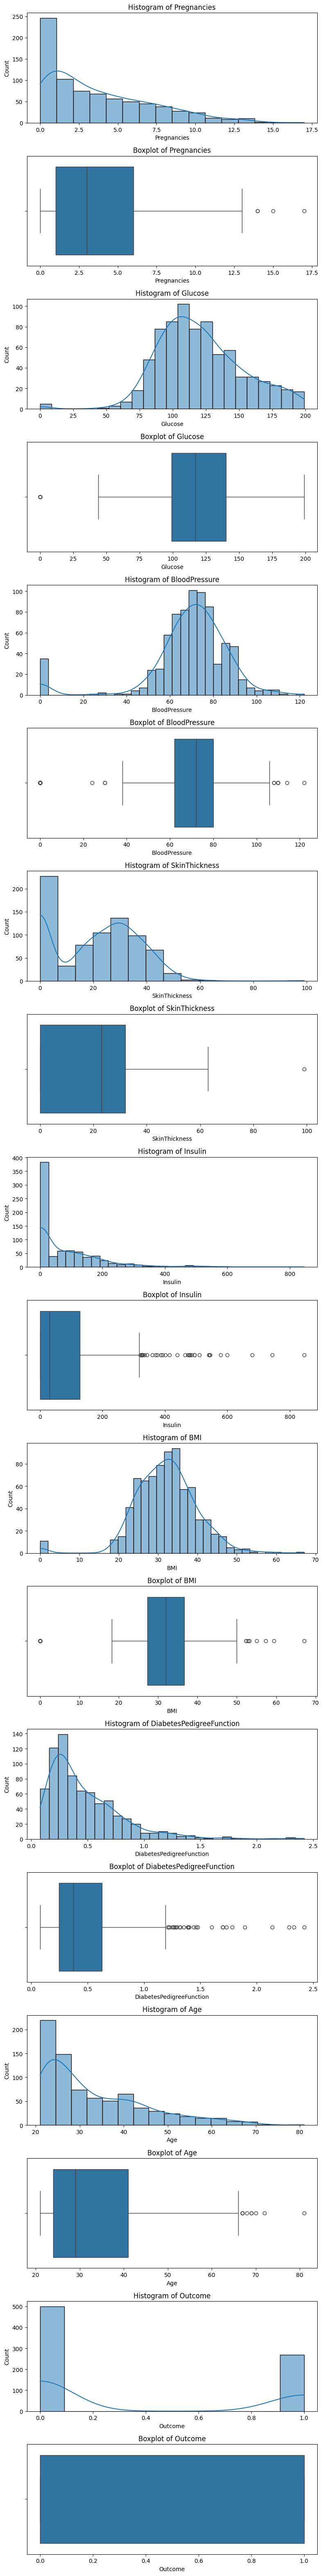

In [9]:
numericals_variables = total_data.columns.tolist()

 # Crear la figura con 1 columnas y 2 filas por variable.
fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))
    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),
        'campaign': (0, 20),
        'pdays': (0, 2000),
        # Añadir más columnas y rangos si es necesario...
    }
    # Iterar sobre cada columna del DataFrame
for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = total_data, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma
        # Boxplot en la segunda fila
        sns.boxplot(data = total_data, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot
plt.tight_layout()
plt.show()

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

In [10]:
numericals_variables = total_data.columns.tolist()
print(numericals_variables)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


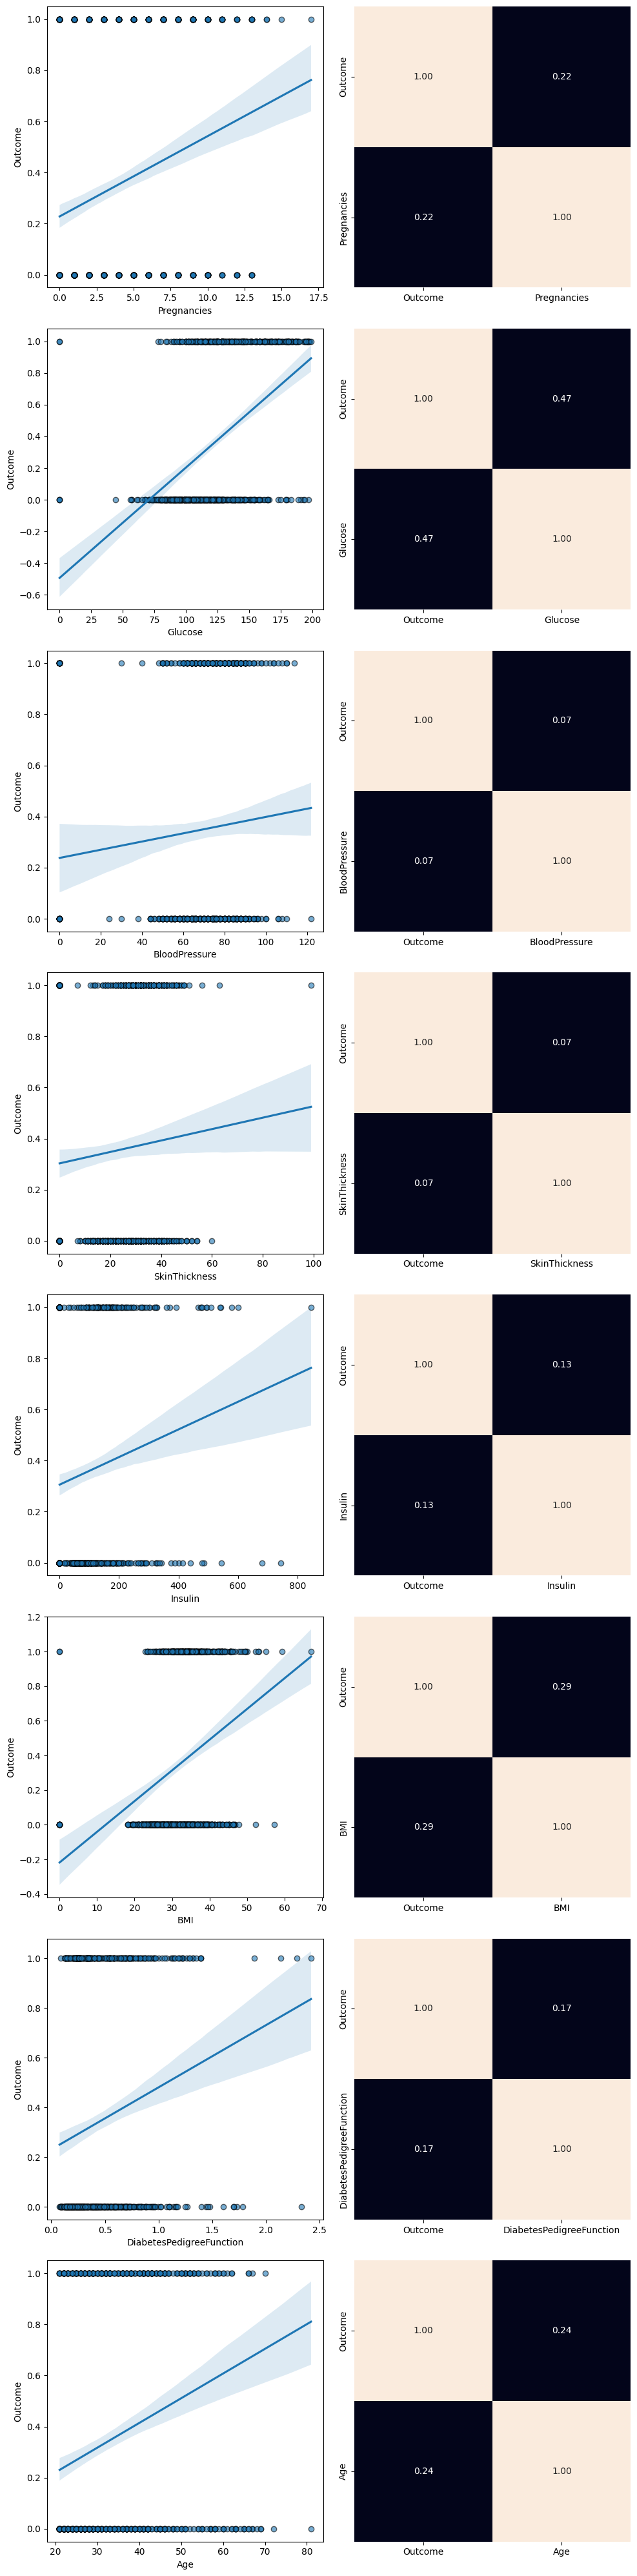

In [11]:
# Crear la variable objetivo
target = total_data["Outcome"]
numericals_variables_sin_target = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Crear la figura y los ejes
num_rows = len(numericals_variables_sin_target)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(numericals_variables_sin_target):
    sns.regplot(ax=axis[i, 0], data=total_data, x=var, y=target, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    sns.heatmap(total_data[[target.name, var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

pregnancies - glucose, BMI - age

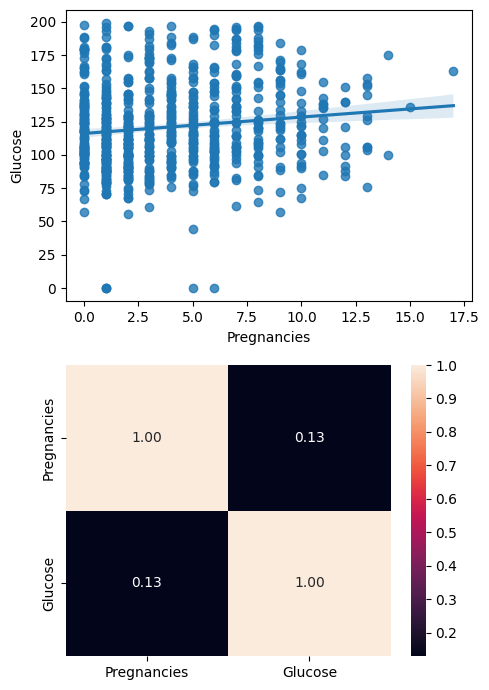

In [12]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "Pregnancies", y = "Glucose")
sns.heatmap(total_data[["Pregnancies", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

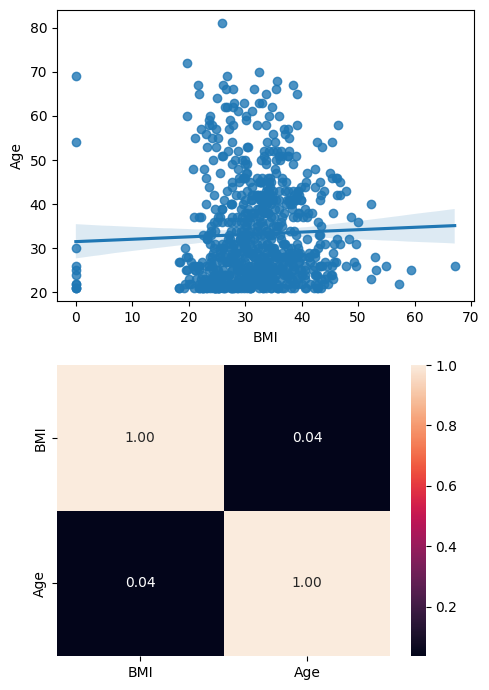

In [13]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "BMI", y = "Age")
sns.heatmap(total_data[["BMI", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

##### Paso 5: Combinaciones de la clase con varias predictoras

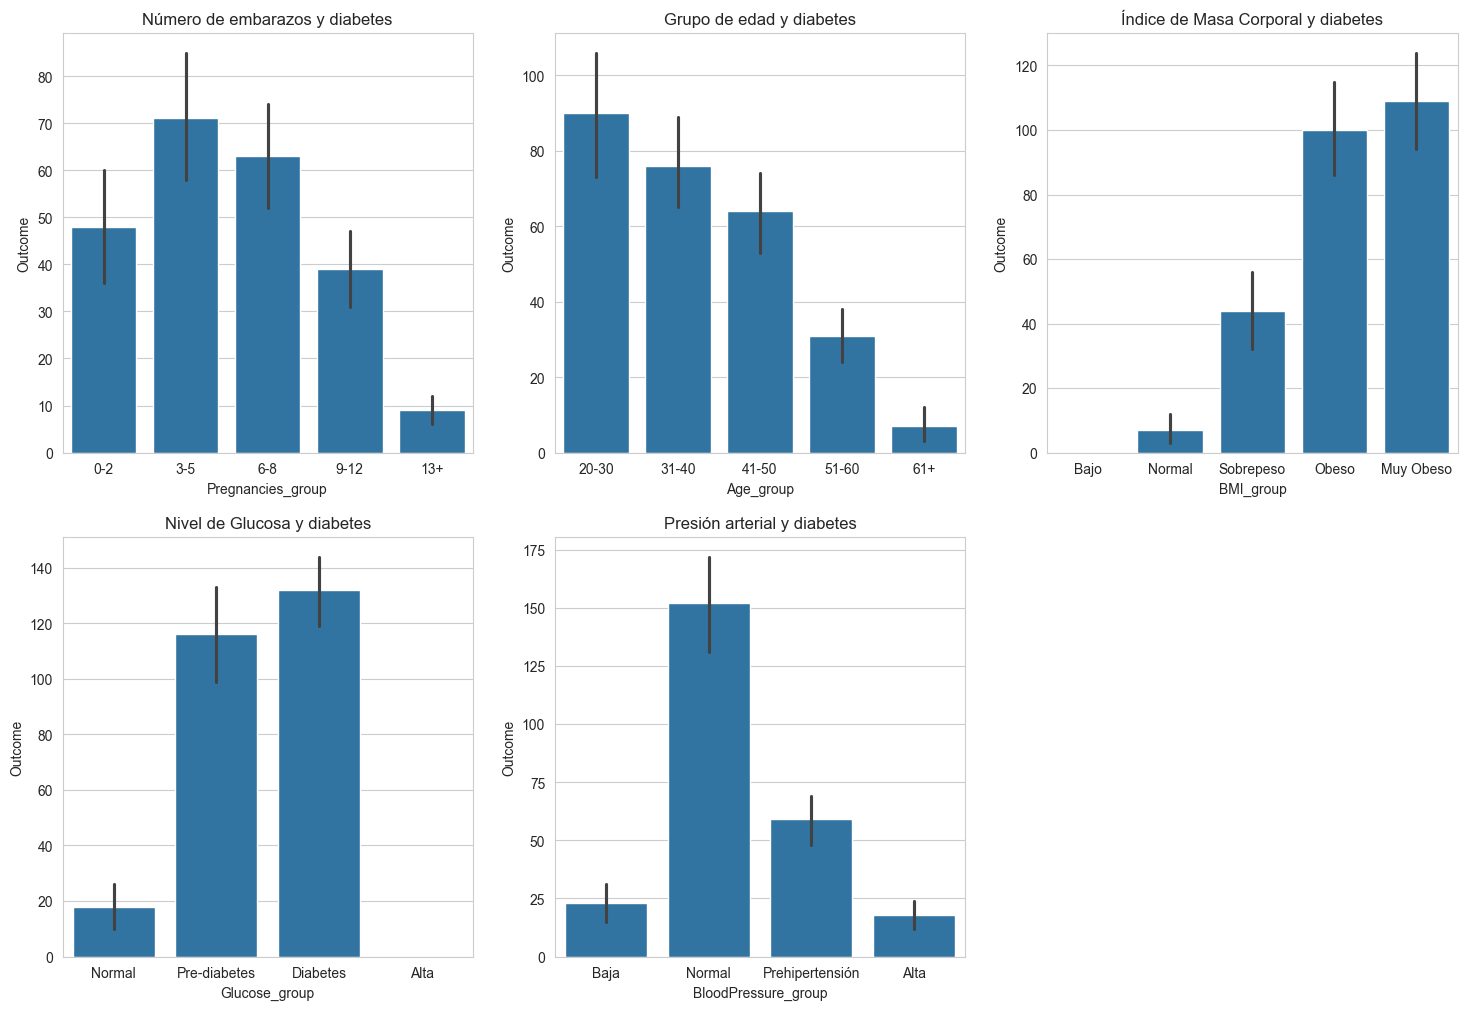

In [14]:
total_data["Pregnancies_group"] = pd.cut(total_data["Pregnancies"], bins=[0, 2, 5, 8, 12, 17], labels=["0-2", "3-5", "6-8", "9-12", "13+"])
total_data["Age_group"] = pd.cut(total_data["Age"], bins=[20, 30, 40, 50, 60, 80], labels=["20-30", "31-40", "41-50", "51-60", "61+"])
total_data["BMI_group"] = pd.cut(total_data["BMI"], bins=[0, 18.5, 25, 30, 35, 50], labels=["Bajo", "Normal", "Sobrepeso", "Obeso", "Muy Obeso"])
total_data["Glucose_group"] = pd.cut(total_data["Glucose"], bins=[0, 100, 140, 200, 300], labels=["Normal", "Pre-diabetes", "Diabetes", "Alta"])

total_data["BloodPressure_group"] = pd.cut(total_data["BloodPressure"], bins=[0, 60, 80, 90, 120], labels=["Baja", "Normal", "Prehipertensión", "Alta"])

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(ax=axes[0, 0], data=total_data, x="Pregnancies_group", y="Outcome", estimator=sum)
axes[0, 0].set_title("Número de embarazos y diabetes")

sns.barplot(ax=axes[0, 1], data=total_data, x="Age_group", y="Outcome", estimator=sum)
axes[0, 1].set_title("Grupo de edad y diabetes")

sns.barplot(ax=axes[0, 2], data=total_data, x="BMI_group", y="Outcome", estimator=sum)
axes[0, 2].set_title("Índice de Masa Corporal y diabetes")

sns.barplot(ax=axes[1, 0], data=total_data, x="Glucose_group", y="Outcome", estimator=sum)
axes[1, 0].set_title("Nivel de Glucosa y diabetes")

sns.barplot(ax=axes[1, 1], data=total_data, x="BloodPressure_group", y="Outcome", estimator=sum)
axes[1, 1].set_title("Presión arterial y diabetes")

fig.delaxes(axes[1, 2])  # Remover gráfico


##### Paso 6: Análisis de correlaciones

In [15]:
column_list = total_data.columns.tolist()
print(column_list)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_group', 'Age_group', 'BMI_group', 'Glucose_group', 'BloodPressure_group']


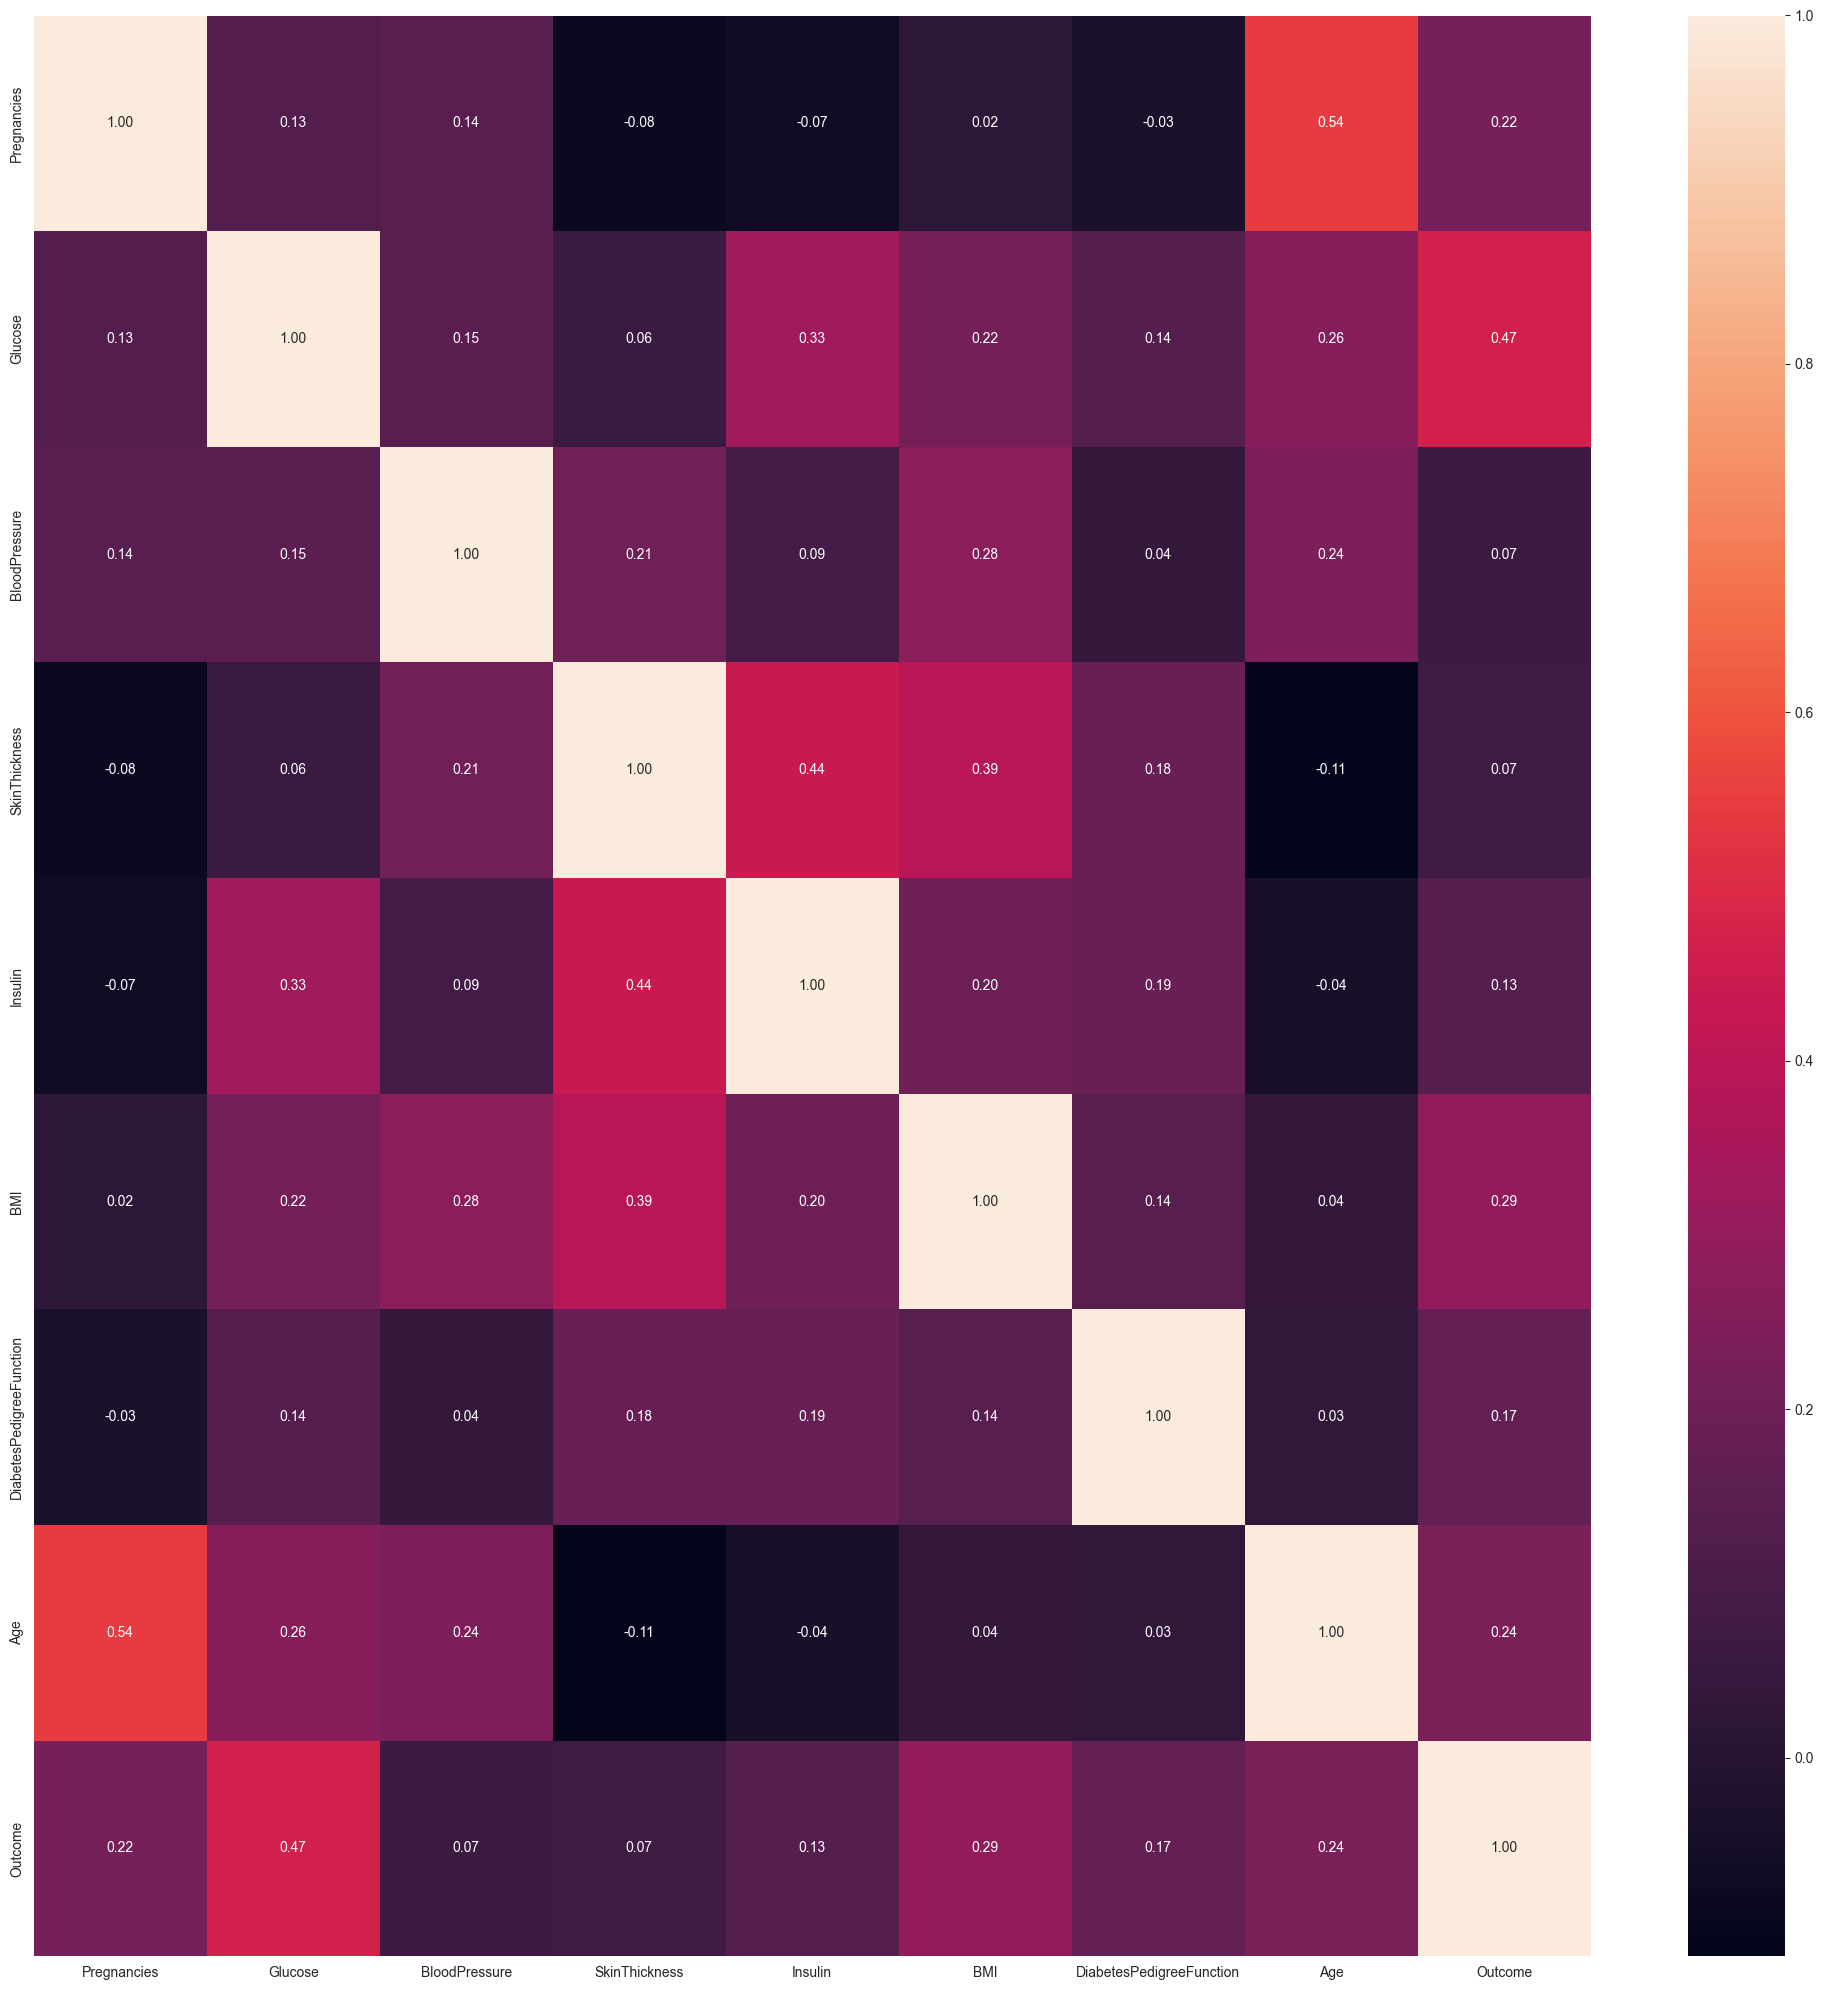

In [16]:
fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(total_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

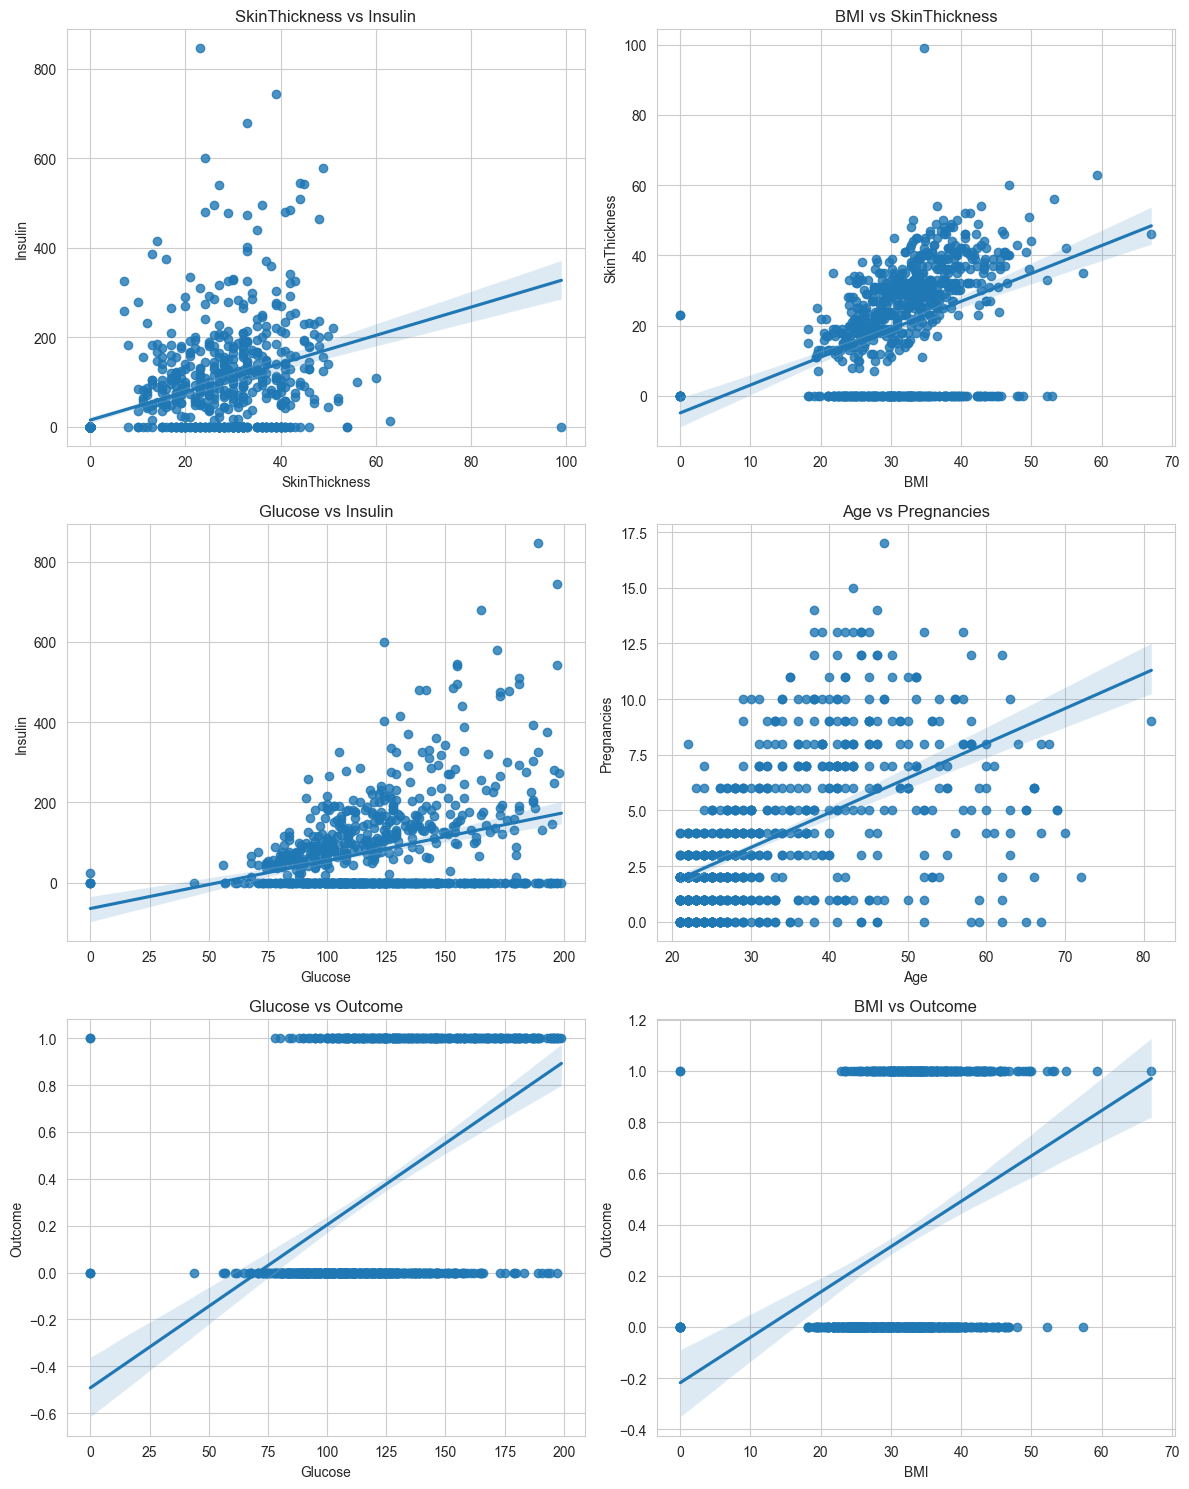

In [17]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

sns.regplot(ax=axes[0, 0], data=total_data, x="SkinThickness", y="Insulin")
axes[0, 0].set_title("SkinThickness vs Insulin")

sns.regplot(ax=axes[0, 1], data=total_data, x="BMI", y="SkinThickness")
axes[0, 1].set_title("BMI vs SkinThickness")

sns.regplot(ax=axes[1, 0], data=total_data, x="Glucose", y="Insulin")
axes[1, 0].set_title("Glucose vs Insulin")

sns.regplot(ax=axes[1, 1], data=total_data, x="Age", y="Pregnancies")
axes[1, 1].set_title("Age vs Pregnancies")

sns.regplot(ax=axes[2, 0], data=total_data, x="Glucose", y="Outcome")
axes[2, 0].set_title("Glucose vs Outcome")

sns.regplot(ax=axes[2, 1], data=total_data, x="BMI", y="Outcome")
axes[2, 1].set_title("BMI vs Outcome")

plt.tight_layout()
plt.show()


In [18]:
total_data.drop(["Pregnancies_group", "Age_group", "BMI_group", "Glucose_group", "BloodPressure_group"], axis = 1, inplace = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


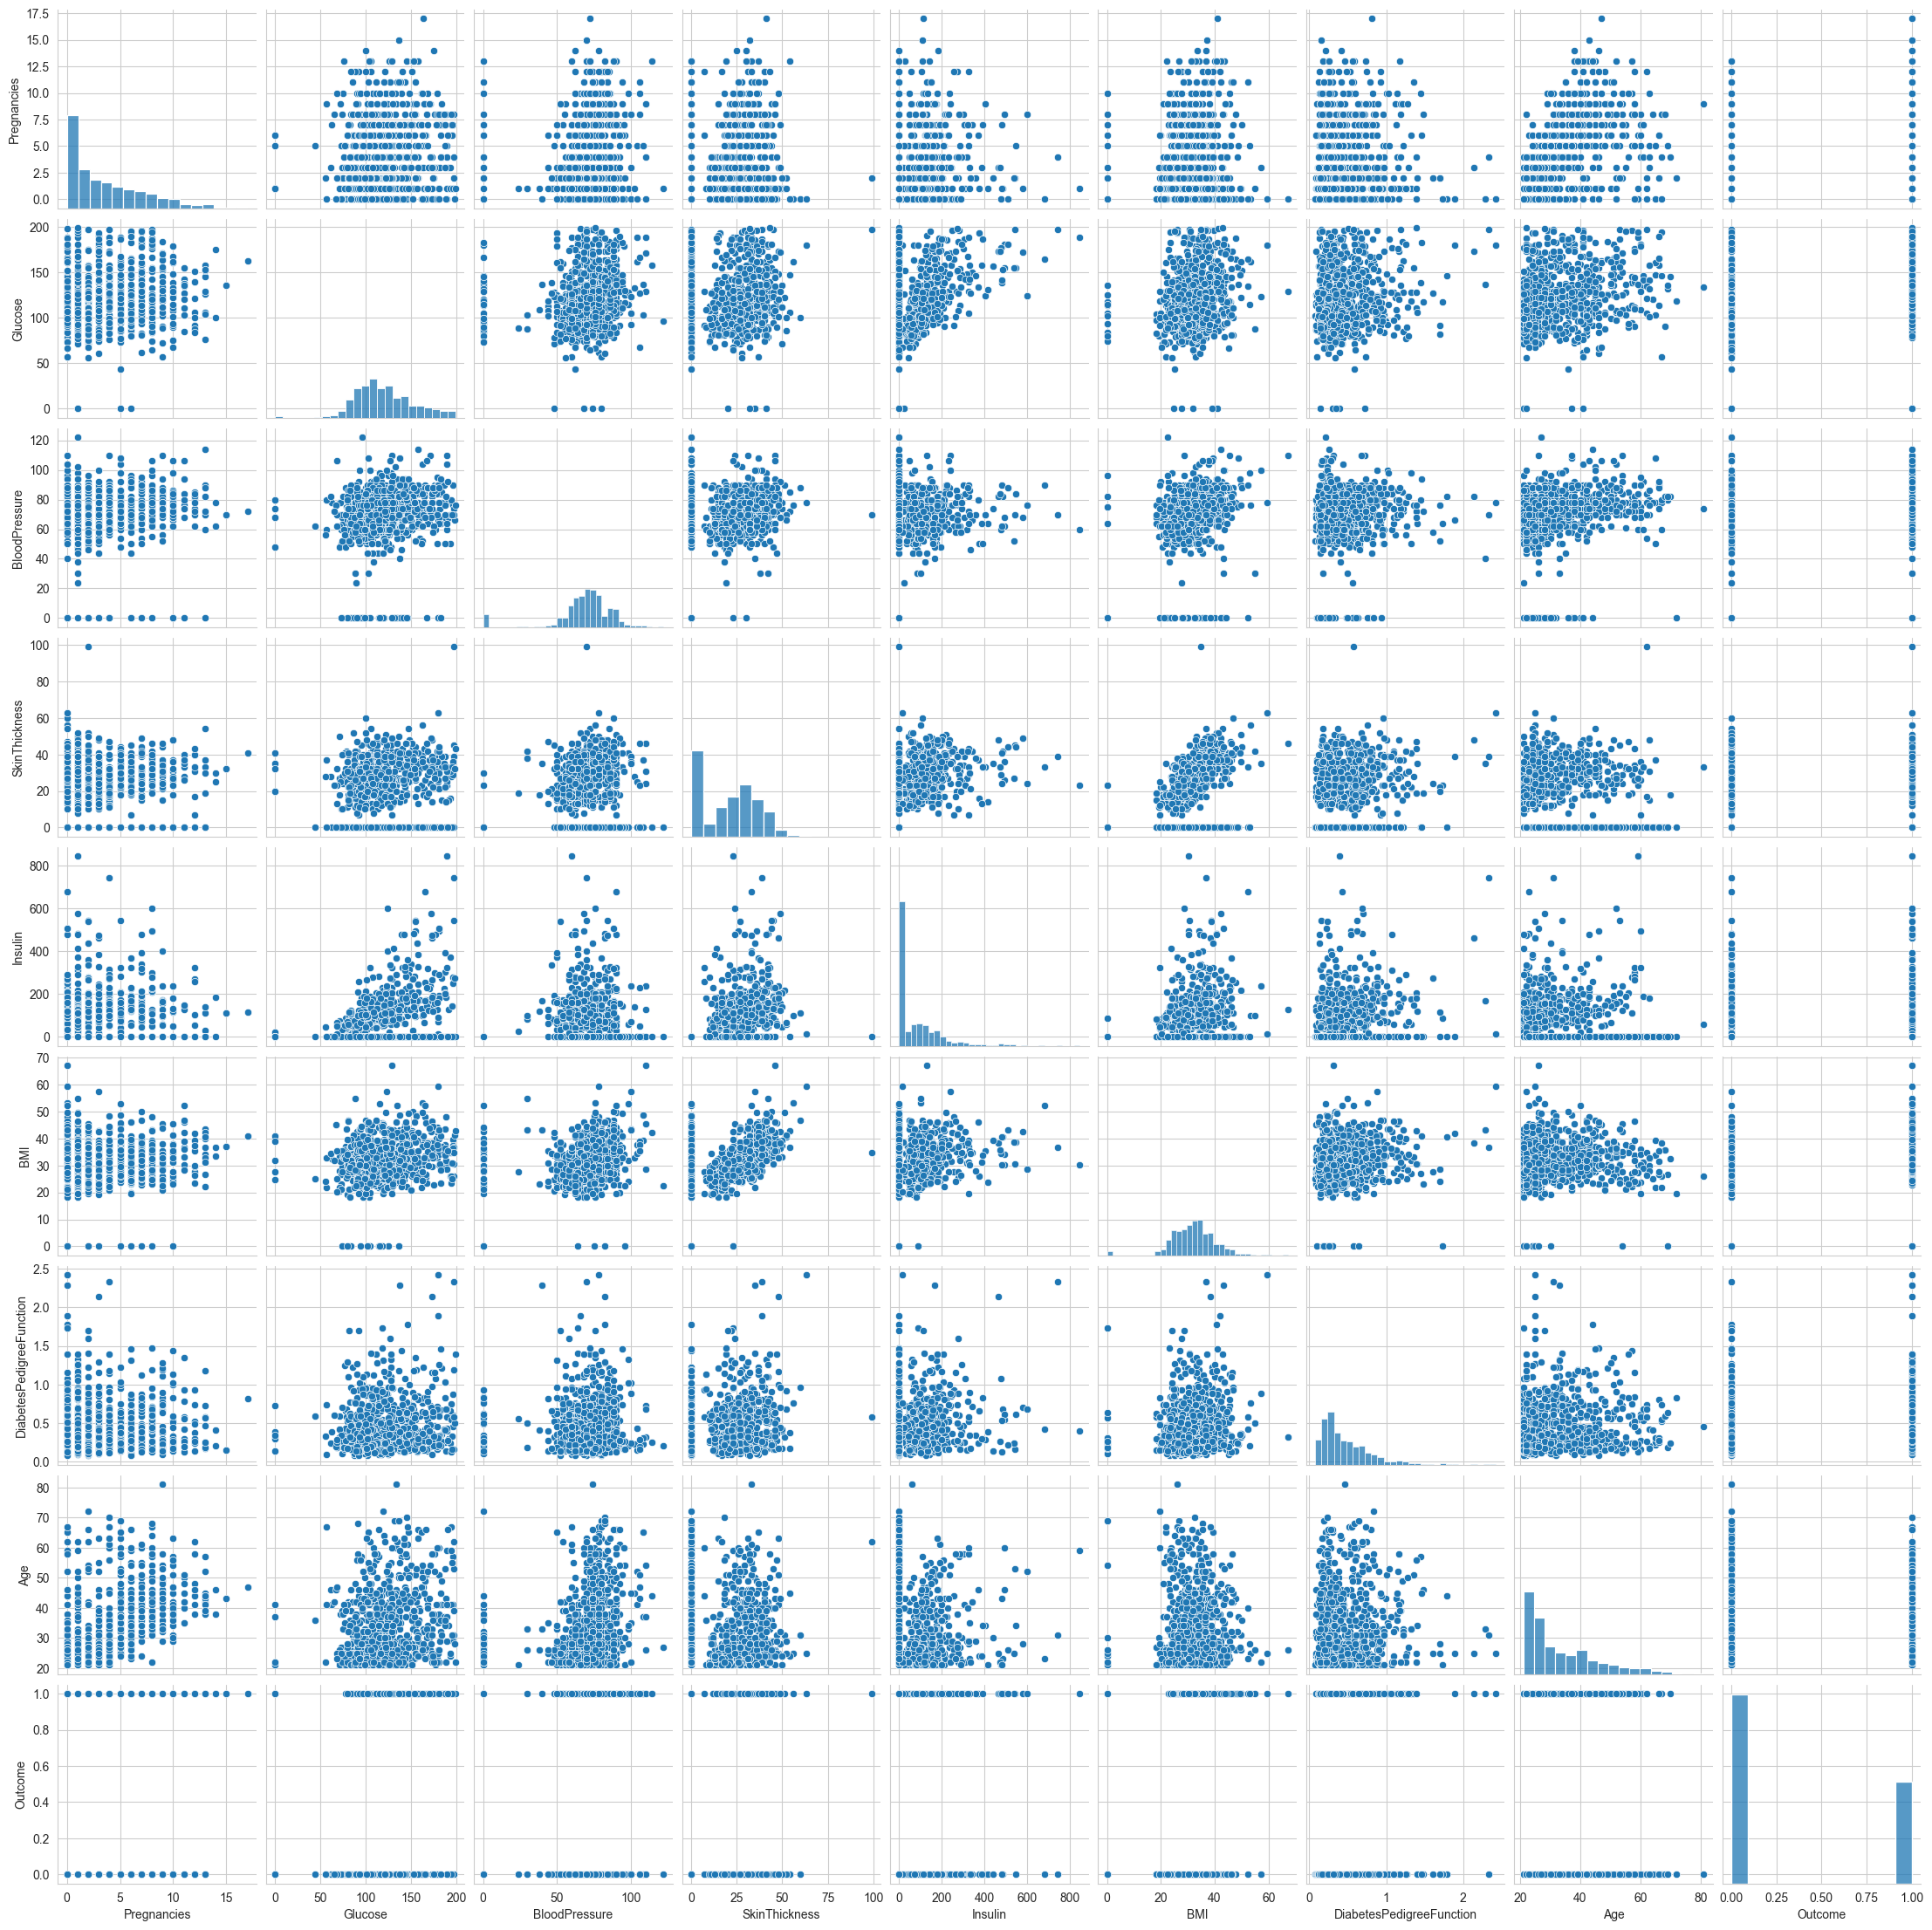

In [19]:
sns.pairplot(data = total_data)

### Paso 7: Ingeniería de características

In [20]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


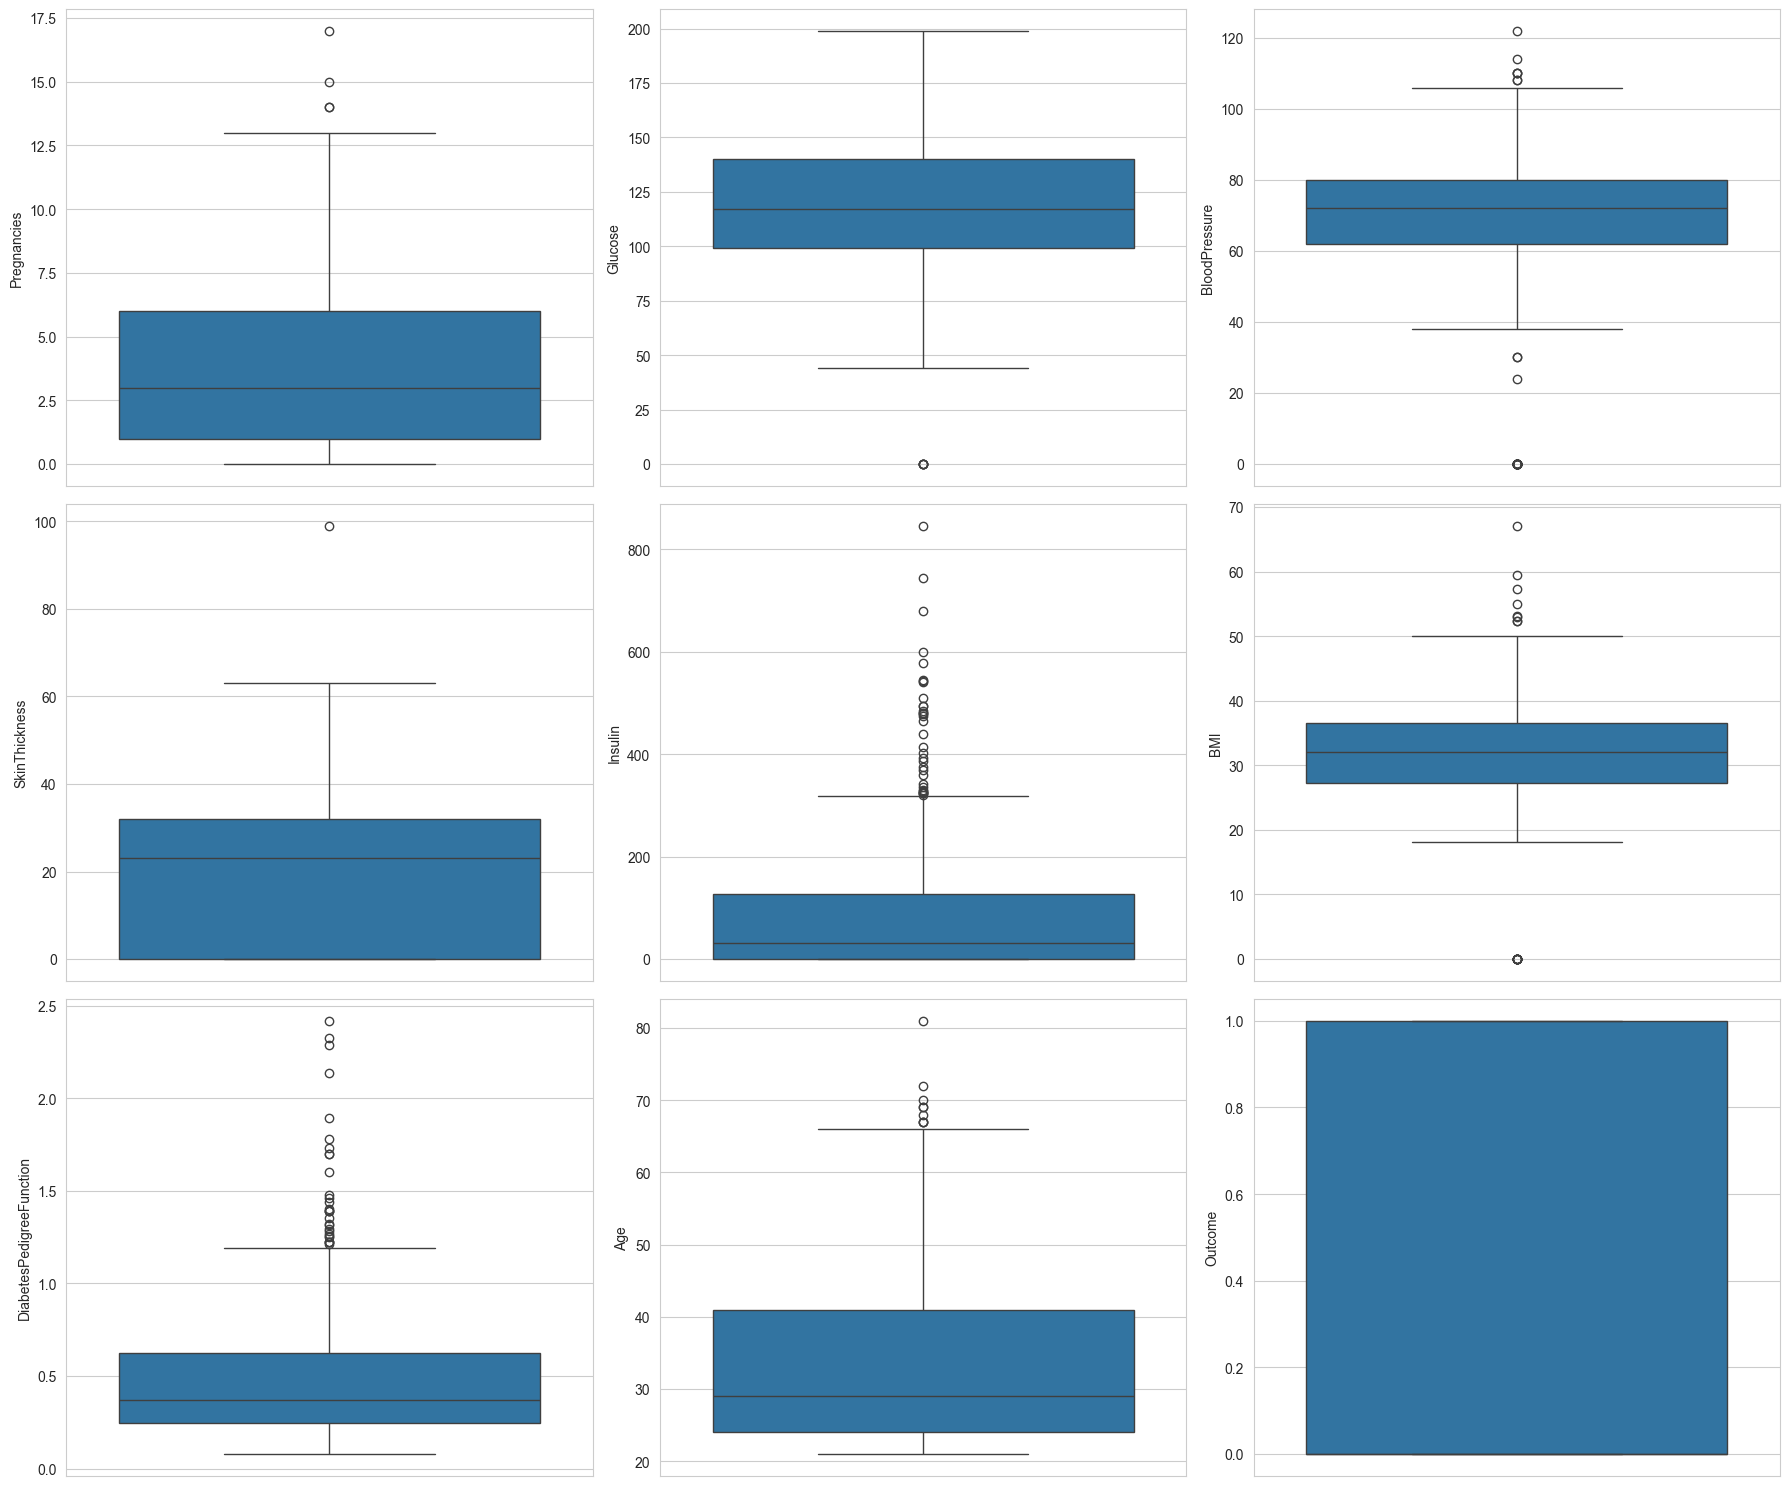

In [21]:
# Obtener las columnas numéricas del DataFrame
columns = total_data.select_dtypes(include=['number']).columns.tolist()

# Crear la figura y los ejes
num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias

#indicar número de columnas que deseas
num_cols = 3

fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))

# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    row = i // num_cols  # Calcula la fila
    col_index = i % num_cols  # Calcula el índice de la columna
    sns.boxplot(ax=axis[row, col_index], data=total_data, y=col)

# Eliminar ejes vacíos si los hay
for j in range(len(columns), num_rows * num_cols):
    fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

- Las variables afectadas por outliers son: "Pregnancies", "Glucose", "BloodPressure" y "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age".

In [22]:
import json

total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0:
    lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)]}

In [23]:
total_data_sin_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


#### Análisis de valores faltantes

In [24]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Escalado de valores

In [26]:
### ELEGIR LAS VARIABLES NUMÉRICAS (NO USAR LA TARGET)
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

# Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# Por ejemplo, si quieres excluir algunas columnas específicas:
excluded_columns = ["Outcome"]  # Coloca aquí cualquier columna que quieras excluir

# Filtrar las columnas excluidas
num_variables = [col for col in num_variables if col not in excluded_columns]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("Outcome", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_con_outliers["Outcome"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels/y_train.xlsx", index = False)
y_test.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


### Paso 8: Selección de características

In [27]:
# Con un valor de k = 4 (podemos elegir cualquier otro valor) decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_con_outliers.columns.values[ix])

# GUARDO X_train_sel.columns
import json

with open("feature_selection_k_4.json", "w") as f:
  json.dump(X_train_sel.columns.tolist(), f)

# GUARDAR LOS DATASETS
X_train_sel.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels/X_train_sel_k4.xlsx", index = False)
X_test_sel.to_excel("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/booster-random-forest-machine-learning-python-template/data/processed/excels_test_sel_k4.xlsx", index = False)
X_train_sel.head()

,Pregnancies,Glucose,BMI,Age
0,2.0,84.0,13.35,21.0
1,9.0,112.0,28.20,50.0
2,1.0,139.0,28.70,22.0
3,0.0,161.0,21.90,65.0
4,6.0,134.0,46.20,46.0
